In [25]:
import matplotlib
# below is needed to avoid message ""Backend TkAgg is interactive backend. Turning interactive mode on"
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from cycler import cycler

from typing import Iterator, Mapping, Tuple, Optional, Callable, Mapping, List
from collections import defaultdict
import os
from contextlib import AbstractContextManager

import numpy as np

from nanugpt import utils


In [26]:
def make_plot(title:str, data:List[Tuple[int, int, float]],
              save_filepath:Optional[str]):
    # using the data in plot_data, plot throughput vs grad_acc_steps, one curve with each device_batch_size, include legends and axis labels

    color_palette = utils.infinite_iter(plt.get_cmap('tab10').colors)
    line_styles = utils.infinite_iter(list(matplotlib.lines.lineStyles.keys()))
    marker_styles = utils.infinite_iter(list(k for k in matplotlib.markers.MarkerStyle.markers.keys() if isinstance(k, str)))

    # prepare data
    plots = defaultdict(list)
    for d in data:
        bs, gs, th, *_ = d
        if th > 0: # don't include error points
            plots[bs].append((gs, th))

    fig, ax = plt.subplots()
    for bs, data in plots.items():
        gs, th = zip(*data)
        ax.plot(gs, th, label=f'bs={bs}', linewidth=2,
                color=next(color_palette),
                linestyle=next(line_styles),
                marker=next(marker_styles),
        )

    # set labels
    ax.set_xlabel('grad_acc_steps')
    ax.set_ylabel('samples_per_sec')
    plt.title(title)

    # add a legend
    ax.legend()

    # theme the plot
    ax.grid('on')
    # change the color of the top and right spines to opaque gray
    ax.spines['right'].set_color((.8,.8,.8))
    ax.spines['top'].set_color((.8,.8,.8))
    # tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()

    xlab.set_style('italic')
    xlab.set_size(10)
    ylab.set_style('italic')
    ylab.set_size(10)

    # Getting current tick locations
    current_xticks = plt.xticks()[0]
    current_yticks = plt.yticks()[0]

    # # Calculating new ticks (increasing by a factor of 5)
    # new_xticks = np.linspace(current_xticks[0], current_xticks[-1], len(current_xticks) * 5)
    # new_yticks = np.linspace(current_yticks[0], current_yticks[-1], len(current_yticks) * 5)

    # # Creating new ticks but keeping labels only for the original ticks
    # new_xtick_labels = ['' if x not in current_xticks else str(x) for x in new_xticks]
    # new_ytick_labels = ['' if y not in current_yticks else str(y) for y in new_yticks]

    # # Setting new tick locations
    # plt.xticks(new_xticks, new_xtick_labels)
    # plt.yticks(new_yticks, new_ytick_labels)

    # # Adjusting the intermediate tick labels' opacity
    # for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    #     if label.get_text() == '':
    #         label.set_alpha(0.1)

    # tweak the title
    ttl = ax.title
    ttl.set_weight('bold')

    # save the figure
    if save_filepath:
        fig.savefig(utils.full_path(save_filepath))

    return plt, fig

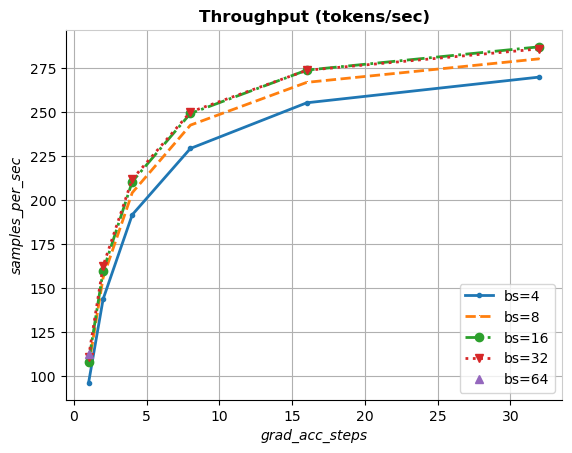

In [27]:
data = utils.load_yaml('/home/shitals/out_dir/gpt2_124m_tinystories/throughput.yaml')
plt, fig = make_plot('Throughput (tokens/sec)', data, None)